# Description of the dataset

## Goal: 
Our project aims to use Python and data mining techniques on a heart failure prediction dataset. With attributes like age, sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, and HeartDisease, we'll preprocess the data, apply different mining techniques, compare results, and share our findings on a GitHub repository with Jupyter notebooks. The focus is on creating effective models for heart failure prediction.

## Source of dataset:
the source of dataset is kaggle. [Link] (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) .

## General information:
our dataset contains 12 attributes and 918 objects and the type of attributes are:

| Attribute       | Description                                                                             | Data Type        |
|-----------------|-----------------------------------------------------------------------------------------|------------------|
| Age             | Age of the patient [range between 28 to 77]                                                              | Numeric (Integer)|
| Sex             | Sex of the patient [M: Male, F: Female]                                                | Categorical      |
| ChestPainType   | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] | Categorical      |
| RestingBP       | Resting blood pressure [range between 0 to 200]                                                         | Numeric (Integer)|
| Cholesterol     | Serum cholesterol [range between 0 to 603]                                                              | Numeric (Integer)|
| FastingBS       | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]                         | Categorical      |
| RestingECG      | Resting electrocardiogram results [Normal: Normal, ST: ST-T wave abnormality, LVH: Left ventricular hypertrophy] | Categorical      |
| MaxHR           | Maximum heart rate achieved [range between 60 to 202]                          | Numeric (Integer)|
| ExerciseAngina  | Exercise-induced angina [Y: Yes, N: No]                                                | Categorical      |
| Oldpeak         | Oldpeak = ST depression [Numeric value measured in depression]                          | Numeric (Float)  |
| ST_Slope        | Slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]     | Categorical      |
| HeartDisease    | Output class [1: heart disease, 0: Normal]                                             | Categorical      |

class label: HeartDisease (occurence of heart disease and not occurance) 

# phase 2

In [6]:
import piplite
await piplite.install('seaborn')

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## reading the data and view first five row of dataSet
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
## number of row
NR=df.shape[0]
print (NR)

918


In [5]:
## number of columns
NC=df.shape[1]
print (NC)

12


# graphs:

#### -Boxplot:

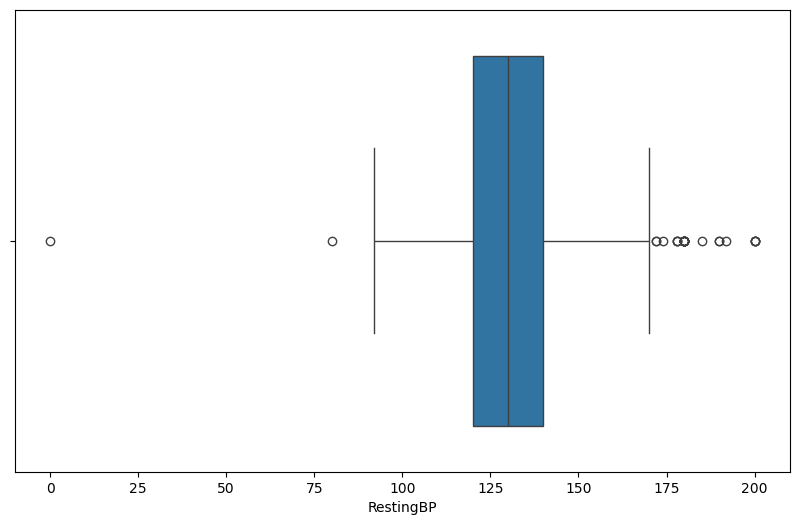

In [43]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='RestingBP', data=df)
plt.show()

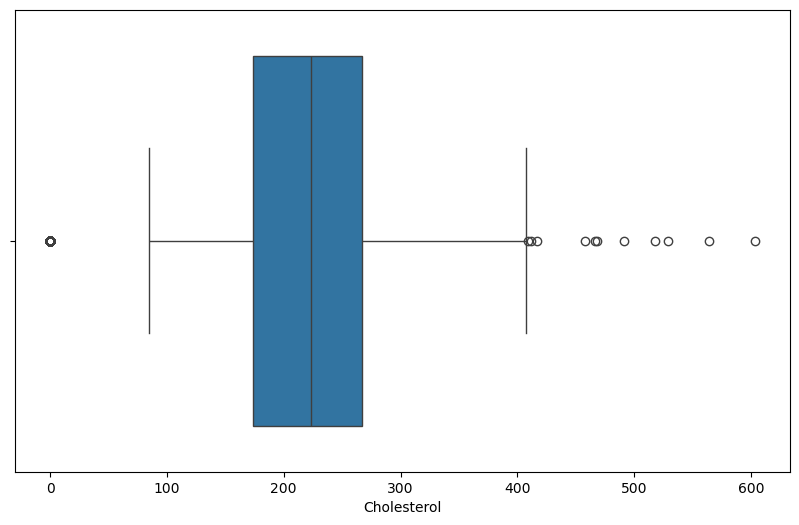

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cholesterol', data=df)
plt.show()

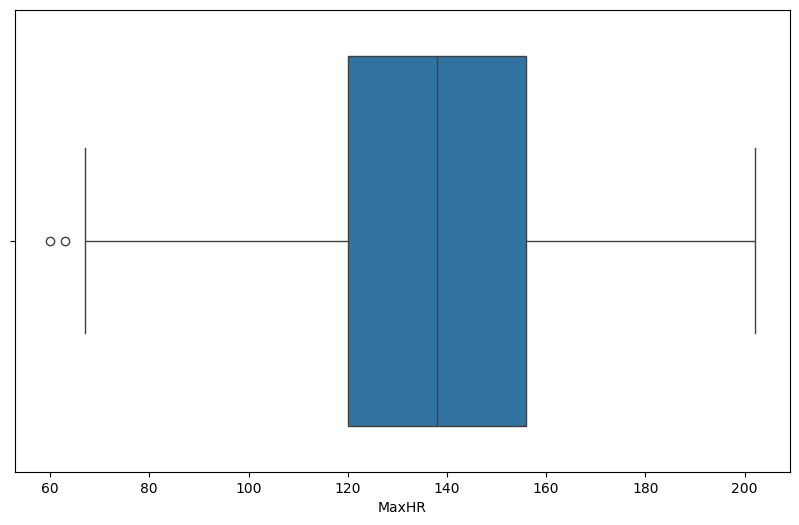

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaxHR', data=df)
plt.show()

These boxplots provide a concise summary of the distribution, central tendency, and potential outliers for the respective physiological measures in our dataset, After plotting the data using box plots, it's clear that there are outliers in all the attributes.

### -Histogram:


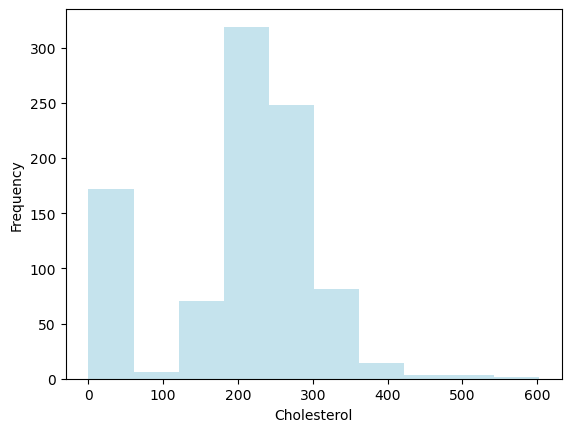

In [8]:
plt.hist(df['Cholesterol'], color='lightblue', alpha=0.7)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()


The histogram represents the distribution of cholesterol levels ('Cholesterol') in the dataset. The x-axis displays different ranges of cholesterol values, while the y-axis represents the frequency of occurrences ,Cholesterol levels in the range of 0-80 have more than 160 occurrences. ,The range from 110 to 190 has approximately 70 occurrences,Cholesterol levels in the range of 190 to more than 240 have more than 300 occurrences ,The range from 140 to 300 has 250 occurrences,Cholesterol levels in the range of 300 to more than 350 have more than 150 occurrences.
The range from 350 to 410 has 10 occurrences.

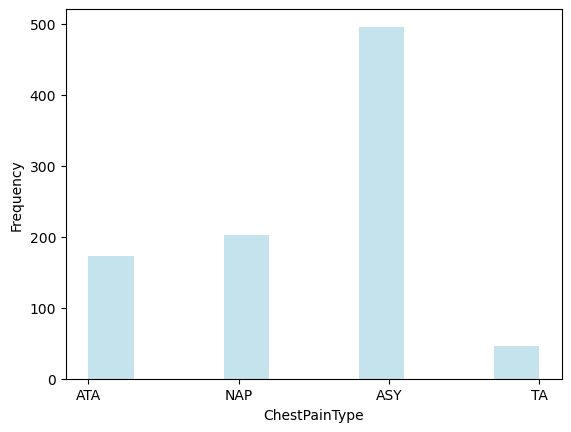

In [63]:
plt.hist(df['ChestPainType'], color='lightblue', alpha=0.7)
plt.xlabel('ChestPainType')
plt.ylabel('Frequency')
plt.show()


The histogram illustrates the distribution of different chest pain types ('ChestPainType') in the dataset. Each bar corresponds to a specific chest pain type, and the height of the bars indicates the frequency of occurrences ,"ATA" has more than 180 occurrences.
"NAP" has more than 200 occurrences,"ASY" has approximately 500 occurrences,"TA" has approximately 50 occurrences.
This visualization allows for a quick comparison of the prevalence of each chest pain type, providing insights into the distribution and relative frequencies within the dataset.

### -pieChart:

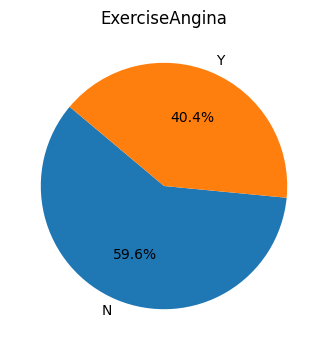

In [110]:
ExerciseAngina_groups = df['ExerciseAngina'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(ExerciseAngina_groups, labels=ExerciseAngina_groups.index, autopct='%1.1f%%', startangle=140)
plt.title('ExerciseAngina')
plt.show()

In the pie chart, 40.4% of the cases are marked as "Yes" for exercise-induced angina, while 59.6% are labeled as "No." This means that a bit over 40% experience exercise-induced angina, while close to 60% do not. The chart gives a straightforward view of how these categories are distributed in the dataset, with a majority falling into the "No" category.

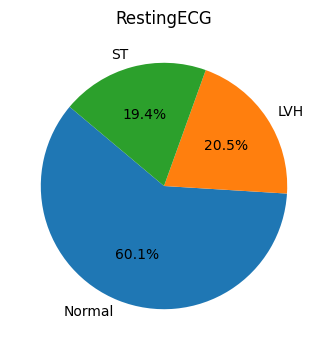

In [111]:
ExerciseAngina_groups = df['RestingECG'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(ExerciseAngina_groups, labels=ExerciseAngina_groups.index, autopct='%1.1f%%', startangle=140)
plt.title('RestingECG')
plt.show()

"ST" constitutes 19.4% of the cases,"LVH" accounts for 20.5%, "Normal" is the majority at 60.1%.
This clear visualization offers a quick overview of how electrocardiogram (ECG) results are categorized in the dataset, with the majority falling into the "Normal" category.

### -Bar chart:

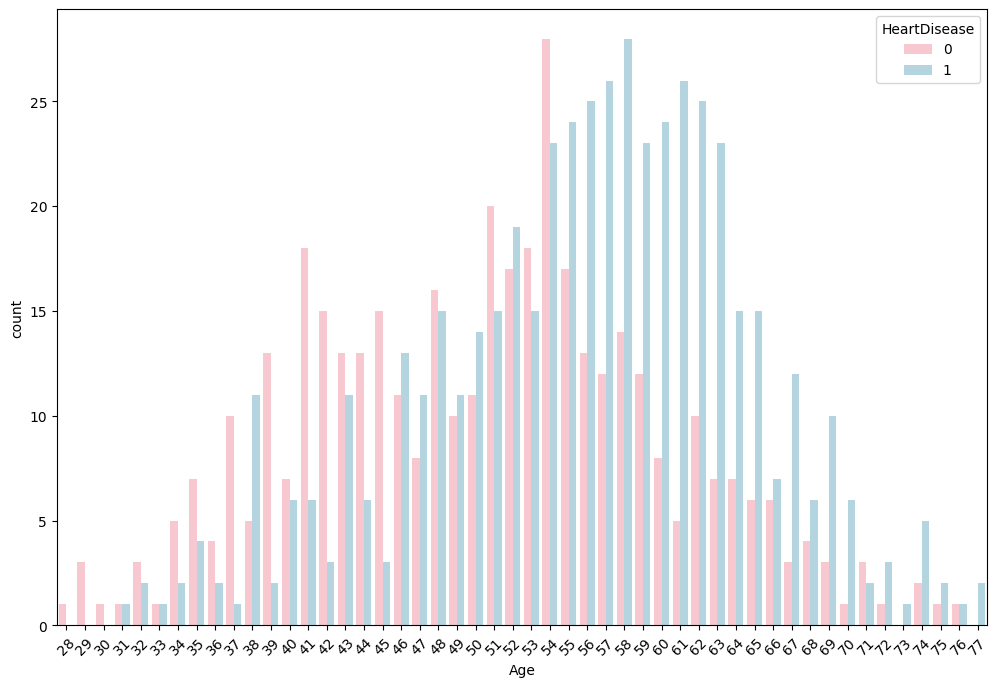

In [102]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age', data=df, hue='HeartDisease',palette= ['pink','lightblue'])
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.show()

The bar chart displays the distribution of 'HeartDisease' across different age groups in the dataset. Each bar represents an age category, and the height of the bars indicates the count of individuals in each group,  The chart allows for a quick comparison of heart disease prevalence among various age brackets, providing insights into potential age-related patterns.

# Data preprocessing:

In [107]:
##check missing values
missing_values=df.isna().sum()

print("Missing Values in each column:")
print(missing_values)

print("\nTotal number of missing values:" ,missing_values.sum())

Missing Values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Total number of missing values: 0


In [120]:
##display staticalsummaries such as mean amd variance

selected_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
selected_data = df[selected_columns]
central_tendency = selected_data.describe()
variance = selected_data.var()
central_tendency.loc['variance'] = variance
display(central_tendency)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000
variance,88.974254,342.773903,11964.891079,0.178968,648.228614,1.137572,0.247420


In [50]:
# detecting the outlier
import numpy as np

means = {col: np.mean(values) for col, values in df.items()}
std_devs = {col: np.std(values) for col, values in df.items()}

threshold = 1.5

for column, values in df.items():
    outliers = [value for value in values if abs(value - means[column]) > threshold * std_devs[column]]
    print(f'Outliers in column {column}: {outliers}')




Outliers in column Age: []
Outliers in column RestingBP: [140]
Outliers in column Cholesterol: [240]
Outliers in column FastingBS: [105]
Outliers in column MaxHR: [140]
Outliers in column Oldpeak: [1.2]


In [46]:
# Remove outlier
import numpy as np
import pandas as pd

selected_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

means = {col: np.mean(df[col]) for col in selected_columns}
std_devs = {col: np.std(df[col]) for col in selected_columns}

threshold = 1.5

cleaned_data = {col: [value if abs(value - means[col]) <= threshold * std_devs[col] or pd.isna(value) else np.nan for value in df[col]] for col in selected_columns}

cleaned_df = pd.DataFrame(cleaned_data)

print(cleaned_df)



   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
0   25      120.0        200.0       90.0  160.0      0.5
1   30      130.0        220.0       95.0  150.0      0.8
2   35      125.0        180.0       88.0  165.0      0.3
3   40        NaN          NaN      100.0    NaN      NaN
4   45      118.0        190.0       92.0  170.0      0.4
5   50      122.0        210.0       98.0  155.0      0.7
6   55      128.0        200.0        NaN  160.0      1.0


In [130]:
## Encoding catogrical data

from sklearn.preprocessing import LabelEncoder
from scipy import stats



le=LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

print(df)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

In [137]:
# Discretization

bins = [-np.inf, 2, 3, 4, np.inf]
labels = ['Very Low', 'Low', 'Medium', 'High']
selected_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
for column in selected_columns:
    df[f'{column}_category'] = pd.cut(df[column], bins=bins, labels=labels, right=False)
print (df)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

In [54]:
#Normalization
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

selected_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

selected_data = df[selected_columns]

scaler = MinMaxScaler()

selected_data_normalized = pd.DataFrame(scaler.fit_transform(selected_data), columns=[f'{col}_normalized' for col in selected_columns])

df = pd.concat([df, selected_data_normalized], axis=1)

print(df)


   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   25        120          200         90    160      0.5             0   
1   30        130          220         95    150      0.8             0   
2   35        125          180         88    165      0.3             0   
3   40        140          240        100    140      1.2             0   
4   45        118          190         92    170      0.4             0   
5   50        122          210         98    155      0.7             0   
6   55        128          200        105    160      1.0             0   

   Age_normalized  RestingBP_normalized  Cholesterol_normalized  ...  \
0        0.000000              0.090909                0.333333  ...   
1        0.166667              0.545455                0.666667  ...   
2        0.333333              0.318182                0.000000  ...   
3        0.500000              1.000000                1.000000  ...   
4        0.666667              0.000000

In [59]:
#Feature selection
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)  
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)

# Initialize the RFE with the classifier and the number of features to select
num_features_to_select = 5  # Replace with the desired number of features
rfe = RFE(estimator=clf, n_features_to_select=num_features_to_select)

# Fit the RFE on the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices = rfe.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected feature names
print("Selected Features:", selected_features)


Selected Features: Index(['Cholesterol_normalized', 'FastingBS_normalized', 'MaxHR_normalized',
       'Oldpeak_normalized', 'HeartDisease_normalized'],
      dtype='object')
